<a href="https://colab.research.google.com/github/Mrinmayi03/CS370/blob/main/HOMEWORK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

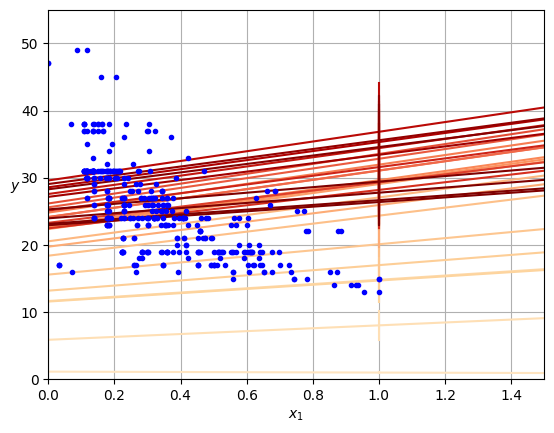

array([[ 31.33021824],
       [-11.03221808],
       [ -7.293165  ]])

In [3]:
from matplotlib.projections.polar import mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Add a bias term (intercept) #comes from github provided
from sklearn.preprocessing import add_dummy_feature

# Load the dataset
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"
df = pd.read_csv(dataset_url)

target_variable_column = df[['city-mpg']]
feature_columns = df[['curb-weight', 'engine-size']]
y = target_variable_column.values
X = feature_columns.values

# min-max scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

X_new = np.array([[0,1], [2,1]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best


#hyperparameters
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
lambda_reg = 0.01 # L2 reg strength

#samples
m = len(X_b)

#features #
n_features = X_b.shape[1]

# model params
np.random.seed(42)
theta = np.random.randn(n_features, 1)

def learning_schedule(t):
    return t0 / (t + t1)

# SGD CODED UP
theta_path_sgd = []

#for plot below
n_shown=30

for epoch in range(n_epochs):
    for i in range(m):

        # to generate figure
        if epoch == 0 and i < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(i / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) + 2 * lambda_reg * theta  # L2_regularization
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 1.5, 0, 55])
plt.grid()
plt.show()

theta